# Approximate Rate Examples

In [1]:
import pynucastro as pyna

Let's create a simple network that has both an $(\alpha, \gamma)$ and
$(\alpha, p)(p, \gamma)$ sequence.

In [2]:
reaclib_library = pyna.ReacLibLibrary()

In [3]:
mylib = reaclib_library.linking_nuclei(["mg24", "al27", "si28", "p31", "s32", "he4", "p"])

In [4]:
rc = pyna.RateCollection(libraries=[mylib])

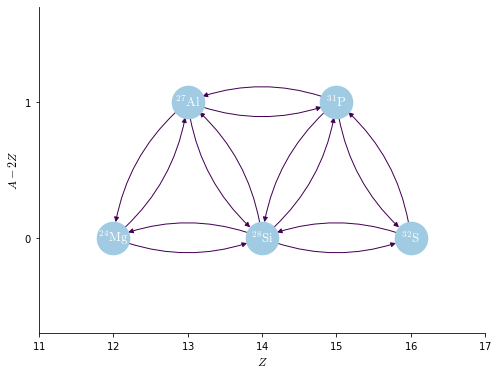

In [5]:
rc.plot(rotated=True, curved_edges=True)

## Approximating

In [6]:
print(rc)

Si28 ‚ü∂ p + Al27
Si28 ‚ü∂ He4 + Mg24
P31 ‚ü∂ He4 + Al27
S32 ‚ü∂ p + P31
S32 ‚ü∂ He4 + Si28
Mg24 + He4 ‚ü∂ Si28 + ùõæ
Al27 + p ‚ü∂ Si28 + ùõæ
Al27 + He4 ‚ü∂ P31 + ùõæ
Si28 + He4 ‚ü∂ S32 + ùõæ
P31 + p ‚ü∂ S32 + ùõæ
Mg24 + He4 ‚ü∂ p + Al27
Al27 + p ‚ü∂ He4 + Mg24
Si28 + He4 ‚ü∂ p + P31
P31 + p ‚ü∂ He4 + Si28



In [7]:
rp = rc.get_rate("he4_mg24__si28")
rs = [rc.get_rate("he4_mg24__p_al27"), rc.get_rate("p_al27__si28")]

In [8]:
rs

[Mg24 + He4 ‚ü∂ p + Al27, Al27 + p ‚ü∂ Si28 + ùõæ]

In [9]:
rp_reverse = rc.get_rate("si28__he4_mg24")
rs_reverse = [rc.get_rate("si28__p_al27"), rc.get_rate("p_al27__he4_mg24")]

In [10]:
ar = pyna.ApproximateRate(primary_rate=rp, secondary_rates=rs,
                          primary_reverse=rp_reverse, secondary_reverse=rs_reverse)

In [11]:
ar.fname

'mg24_he4__si28'

## evaluate

at low T, the reverse rates should be insignificant and our approximate rate should reduce to the sum of $(\alpha, \gamma)$ and $(\alpha, p)$

In [12]:
T = 1.e9

In [13]:
ar.eval(T)

0.0008099307826081986

In [14]:
rp.eval(T) + rs[0].eval(T)

0.0008118513074816655

at high T, the approximate rate will be lower because we start to see the effect of the reverse rate consuming the protons

In [15]:
T = 2.e9

In [16]:
ar.eval(T)

1.2493589240464626

In [17]:
rp.eval(T) + rs[0].eval(T)

3.6337850135767833

In [18]:
rs[0].eval(T)

2.7769870580356923

In [19]:
rs[1].eval(T)

2764.8859864765686

In [20]:
rs_reverse[1].eval(T)

16793.993314802243

# Redo the RateCollection

In [21]:
rc.make_ap_pg_approx()

using approximate rate Mg24 + He4 ‚ü∂ Si28 + ùõæ
using approximate rate Si28 ‚ü∂ Mg24 + He4
using approximate rate Si28 + He4 ‚ü∂ S32 + ùõæ
using approximate rate S32 ‚ü∂ Si28 + He4
removing rate Mg24 + He4 ‚ü∂ Si28 + ùõæ
removing rate Mg24 + He4 ‚ü∂ p + Al27
removing rate Al27 + p ‚ü∂ Si28 + ùõæ
removing rate Si28 ‚ü∂ He4 + Mg24
removing rate Si28 ‚ü∂ p + Al27
removing rate Al27 + p ‚ü∂ He4 + Mg24
removing rate Si28 + He4 ‚ü∂ S32 + ùõæ
removing rate Si28 + He4 ‚ü∂ p + P31
removing rate P31 + p ‚ü∂ S32 + ùõæ
removing rate S32 ‚ü∂ He4 + Si28
removing rate S32 ‚ü∂ p + P31
removing rate P31 + p ‚ü∂ He4 + Si28


In [22]:
rc

P31 ‚ü∂ He4 + Al27
Al27 + He4 ‚ü∂ P31 + ùõæ
Mg24 + He4 ‚ü∂ Si28 + ùõæ
Si28 ‚ü∂ Mg24 + He4
Si28 + He4 ‚ü∂ S32 + ùõæ
S32 ‚ü∂ Si28 + He4

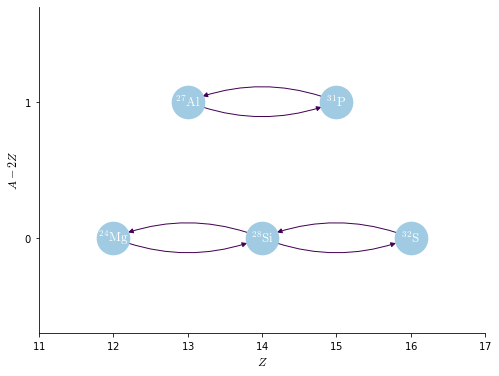

In [23]:
rc.plot(rotated=True, curved_edges=True)

now remove the isolated Al27 and P31 nuclei

In [24]:
rc.remove_nuclei([pyna.Nucleus("al27"), pyna.Nucleus("p31")])

looking to remove P31 ‚ü∂ He4 + Al27
looking to remove Al27 + He4 ‚ü∂ P31 + ùõæ
looking to remove P31 ‚ü∂ He4 + Al27
looking to remove Al27 + He4 ‚ü∂ P31 + ùõæ


In [25]:
rc

Mg24 + He4 ‚ü∂ Si28 + ùõæ
Si28 ‚ü∂ Mg24 + He4
Si28 + He4 ‚ü∂ S32 + ùõæ
S32 ‚ü∂ Si28 + He4

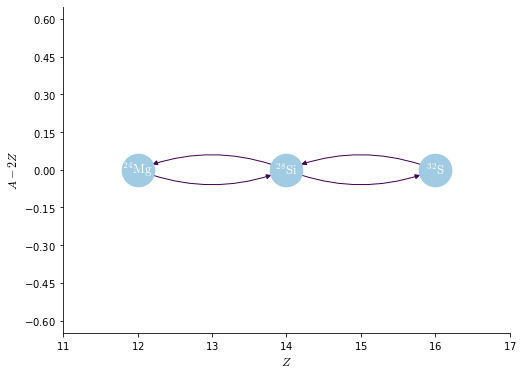

In [26]:
rc.plot(rotated=True, curved_edges=True)